Sprint 6: Machine Learning (Regression models)

In [2]:
import pandas as pd
df_housing = pd.read_csv('/home/sole/Documents/DS/Sprint 5/housing data.csv', header=None)
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.**

Després de mirar-ho bé, he llegit que el model de regresió lineal es un del més adaptats per predir el preu de l'habitatge. 
Model 1: Regressió lineal

Error quadràtic mitjà (MSE): 24.29


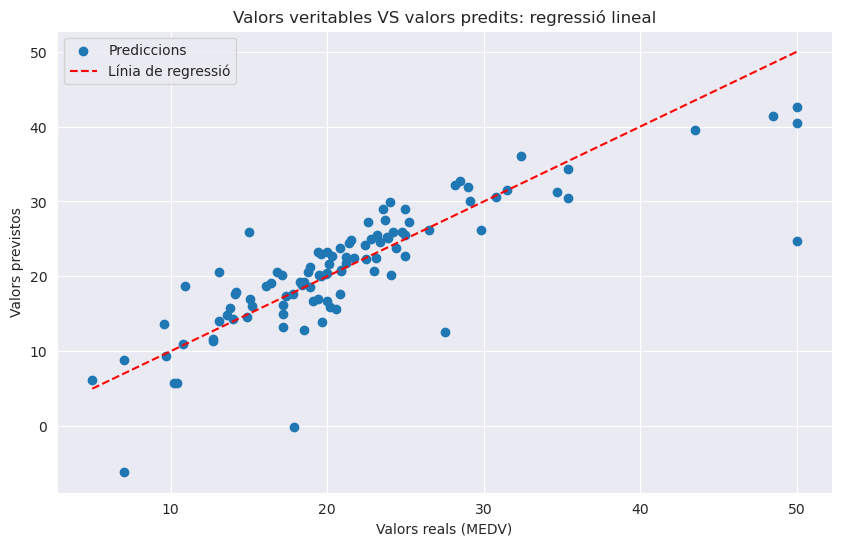

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Definim caracteristiques i la variable target
X = df_housing.drop('MEDV', axis=1)
y = df_housing['MEDV']

# 2. Dividim les dades en train i test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creem un model de regressió lineal
regressor = LinearRegression()

# 4. Entrenem el model
regressor.fit(X_train, y_train)

# 5. Usem les dades de test per fer prediccions
y_pred = regressor.predict(X_test)

# 6. Calculem l'error quadràtic mitjà (mse)
linear_mse = mean_squared_error(y_test, y_pred)
print(f"Error quadràtic mitjà (MSE): {linear_mse:.2f}")

# 7. Grafiquem les dades i la línea de regressió
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Prediccions') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Línia de regressió')
plt.xlabel('Valors reals (MEDV)')
plt.ylabel('Valors previstos')
plt.title('Valors veritables VS valors predits: regressió lineal')
plt.legend()
plt.show()

Model 2: Random Forest Regresor

Error quadrat mitjà de Random Forest: 7.90
R-quadrat (R2) del model: 0.89


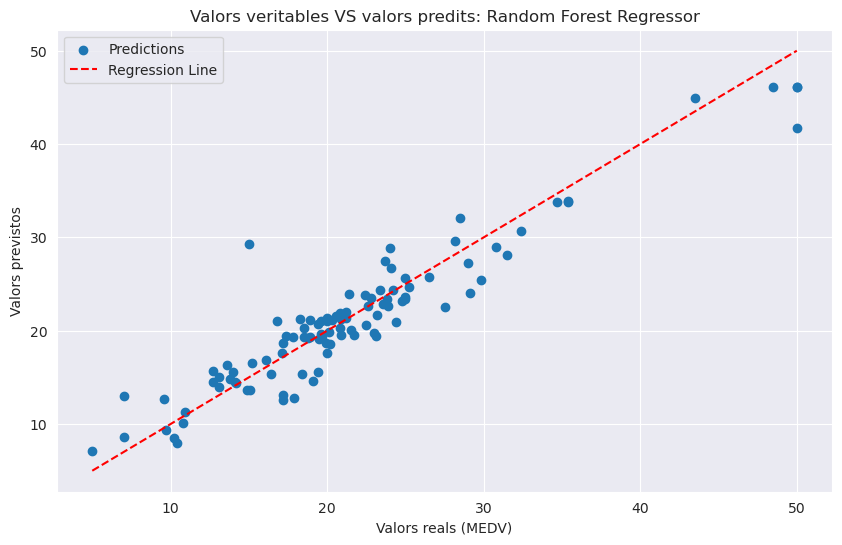

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Definim caracteristiques i la variable target
X = df_housing.drop('MEDV', axis=1)
y = df_housing['MEDV']

# 2. Dividim les dades en train i test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creem un model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. Entrenem el model
rf_model.fit(X_train, y_train)

# 5. Usem les dades de test per fer prediccions
y_pred_rf = rf_model.predict(X_test)

# 6. Calcula l'error quadrat mitjà (mse)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Error quadrat mitjà de Random Forest: {rf_mse:.2f}")

# 7. Calculem el R-quadrat (R2) com a mesura de la precisió del model
r2 = r2_score(y_test, y_pred_rf)
print(f"R-quadrat (R2) del model: {r2:.2f}")

# 8. Grafiquem els resultats real vs predit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Predictions') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Regression Line')
plt.xlabel('Valors reals (MEDV)')
plt.ylabel('Valors previstos')
plt.title('Valors veritables VS valors predits: Random Forest Regressor')
plt.legend()
plt.show()

**Exercici 2
Compara’ls en base al MSE i al R2.**

In [5]:
# 1. Obtenim el MSE de cada model
print('Linear MSE: ', linear_mse)
print('Random Forest MSE: ', rf_mse)

Linear MSE:  24.291119474973478
Random Forest MSE:  7.901513892156864


In [7]:
#2. Obtenim el R2 de cada model
print('Linear R2:', regressor.score(X_test, y_test))
print('Random Forest R2:', rf_model.score(X_test, y_test))

Linear R2: 0.6687594935356326
Random Forest R2: 0.8922527442109116


1. MSE : 
*'Mesura la diferència mitjana entre els valors reals i les prediccions.'*

El model Random Forest té un MSE significativament menor en comparació amb el model Lineal (7.90 vs. 24.29). Podem concloure que el model Random Forest proporciona millors prediccions, ja que té errors més baixos de mitjana.

2. R-Squared (R2):
*'Representa la proporció de la variància de la variable dependent que ha estat explicada per les variables independents al model. Va de 0 a 1, on 1 indica un ajust perfecte.'* 

El model Random Forest (R2 de 0,89), explica una proporció més alta de la variància en la variable target en comparació amb el model lineal (R2 de 0,66). 

**En resum, a partir de les mètriques proporcionades, el model Random Forest és l'opció preferida per fer prediccions del preu de les habitatges (MEDV) a Houston.**

**Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**

En la regressió lineal, no hi ha molts hiperparàmetres per ajustar manualment. 

No obstant això, consideraré la regularització amb 'Ridge', una opció per evitar problemes de sobreajustament. Ridge regression és un mètode d'ajust de models que s'utilitza per analitzar qualsevol dada que pateix multicolinearitat. Aquest mètode realitza la regularització L2. Quan es produeix el problema de la multicolinearitat, els mínims quadrats són imparcials i les variàncies són grans, això fa que els valors predits estiguin lluny dels valors reals.
Seguin el consell de la mentora, combinaré el Ridge amb el methode anomenat GridSearch (analitza totes les combinacions possibles d'hiperparàmetres per trobar el millor model). 

In [8]:
# Model 1
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Realitzem un grid search per a l'ajustament d'hiperparàmetres mitjançant Ridge Regression
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# 2. Evaluem el millor Ridge model
best_ridge = grid_search_ridge.best_estimator_
mse_ridge = mean_squared_error(y_test, best_ridge.predict(X_test))
print(f"Error quadrat mitjà per Ridge Regression: {mse_ridge}")

Error quadrat mitjà per Ridge Regression: 24.29117785131122


In [ ]:
# Model 2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. Definim els parametres per Random Forest Regression
parameters_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Creem un model Random Forest i una instància de GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), parameters_rf, cv=5, scoring='neg_mean_squared_error')

# 3. Ajustem el Grid Search a les dades d'entrenament
grid_search_rf.fit(X_train, y_train)

# 4. Obtenim el millor model Random Forest
best_rf = grid_search_rf.best_estimator_

# 5. Calculem el MSE al conjunt de proves utilitzant el millor model
mse_rf = mean_squared_error(y_test, best_rf.predict(X_test))
print(f"Error Quadràtic Mitjà per a Random Forest Regressor ajustat: {mse_rf}")

Després d'observar aquests resultats podem veure que la versió ajustada dels models donent resultats menys precísos. Llavors en aquest cas, ens podem quedar amb els primers models o pasar temps buscant altres parametres per ajustar per intentar tenir milllors results. 

**Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).**

Vist que per aquest excercici no pateixo de recursos computacionals limitats, vaig a fer un avaluació interna per tenir resultats més precisos. 

In [20]:
# 1. Entrenem el model de regressió lineal amb validació interna
linear_model = LinearRegression()
linear_model.fit(X, y)

# 2. Avaluem el model amb validació interna
y_pred_all = linear_model.predict(X)

# 3. Calculem el MSE
linear_mse_all = mean_squared_error(y, y_pred_all)
print('Linear MSE: ', linear_mse_all)

# 4. Fem la validació interna amb Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# 5. usem les dades de test per fer prediccions
y_pred_all = rf_model.predict(X)

# 6. Calculem l'error quadràtic mitjà (MSE)
rf_mse_all = mean_squared_error(y, y_pred_all)
print('Random Forest MSE: ', rf_mse_all)

Linear MSE:  21.894831181729202
Random Forest MSE:  1.452953930830038


Després d'observar aquests resultats podem veure quels models estant donant numeros més precisos. 

**Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.**

In [21]:
# 1. Eliminem la columna RM i tornem a entrenar el model de regressió lineal
X = X.drop('RM', axis=1)

# 2. Dividim les dades en train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 3. Utilitzem les dades de test per fer prediccions
y_pred = linear_model.predict(X_test)

# 4. Calculem l'error quadràtic mitjà (MSE) del Model Linear
linear_mse = mean_squared_error(y_test, y_pred)
print('Linear MSE: ', linear_mse)

# 5. Aamb Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 6. Utilitzem les dades de test per fer prediccions
y_pred = rf_model.predict(X_test)

# 7. Calculem l'error quadràtic mitjà (MSE) amb Ramdom Forest
rf_mse = mean_squared_error(y_test, y_pred)
print('Random Forest MSE: ', rf_mse)

Linear MSE:  22.133246888189877
Random Forest MSE:  13.65032204901962


Com que no hem utilitzat la variable "RM", ambdós models han millorat significativament el seu rendiment. Això suggereix que "RM" no és una variable informativa per al model.